# ANÁLISIS DE FUERZAS INTERNAS
La viga en voladizo ABCD mostrada en la Figura 1 esta solicitada a una carga distribuida de magnitud máxima 4,8 kN/m y con distribución trapezoidal por los elementos que soporta. Además, sobre la viga actúan cargas concentradas de 3 kN y 8 kN, correspondientes a un equipo y un cable dispuestos para fines recreativos.
![Figura 1](viga.png)
Teniendo en cuenta los valores de `L1 = 0.25m`, `L2 = 0.5m` y `L3 = 2m`, se determinaron las siguientes ecuaciones que representan el diagrama de fuerza cortante para cada tramo:

$$
V(x) = \left\{
    \begin{array}\\
        -9.6x^{2} + 2.8 & \mbox{Tramo 1: } 0 < x <0.25 \\
        - 4.8x - 0.8 & \mbox{Tramo 2: } 0 < x < 0.5\\
        1.2x^{2} - 4.8x + 4.8 & \mbox{Tramo 3: } 0 < x < 2
    \end{array}
\right.
$$

Las ecuaciones obtenidas para el diagrama de momento flector son:

$$
M(x) = \left\{
    \begin{array}\\
        -3.2x^{3} + 2.8x - 2.85 & \mbox{Tramo 1: } 0 < x <0.25 \\
        - 2.4x^{2} - 0.8x -2.2 & \mbox{Tramo 2: } 0 < x < 0.5\\
        0.4x^{3} - 2.4x^{2} + 4.8x -3.2 & \mbox{Tramo 3: } 0 < x < 2
    \end{array}
\right.
$$

In [155]:
import matplotlib.pyplot as plt
import numpy as np

In [201]:
x

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05,
       1.1 , 1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 , 1.55, 1.6 ,
       1.65, 1.7 , 1.75, 1.8 , 1.85, 1.9 , 1.95, 2.  , 2.05, 2.1 , 2.15,
       2.2 , 2.25, 2.3 , 2.35, 2.4 , 2.45, 2.5 , 2.55, 2.6 , 2.65, 2.7 ,
       2.75])

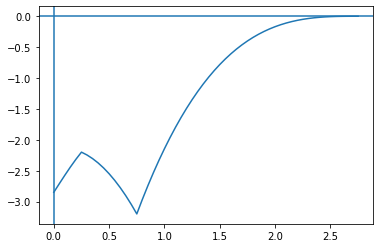

In [203]:
L = 0.25 + 0.5 + 2
# x = np.linspace(0, L, 999)
x = np.arange(0, 2.8, 0.05)

# lambda functions f(x) = x ** 2
tramo1 = lambda x: -3.2 * x ** 3 +  2.8 * x - 2.85
tramo2 = lambda x: -2.4 * (x - 0.25) ** 2 -  0.8 * (x - 0.25) - 2.2
tramo3 = lambda x: 0.4 * (x - 0.75) ** 3 -  2.4 * (x - 0.75) ** 2 + 4.8 * (x - 0.75) - 3.2

y = np.piecewise(x, [x < 0.25, (x >= 0.25) & (x <= 0.75), x >= 0.75], [tramo1, tramo2, tramo3])

plt.plot(x, y)

plt.axhline(0)
plt.axvline(0)

In [157]:
np.amax(y)

3.644999999874443e-05

In [161]:
mom_max = np.amin(y)
mom_max

-3.2

In [163]:
perfiles = pd.read_excel('T2.xlsx', usecols="A:D", nrows=10, skiprows=2, index_col='perfil')
perfiles

,h [mm],b [mm],t [mm]
perfil,,,
1,76,36,5
2,76,38,5
3,102,40,6
4,102,44,6
5,127,45,7
6,127,48,7
7,152,49,8
8,152,52,8
9,178,53,9


In [166]:
h = perfiles.loc[1, 'h [mm]']
b = perfiles.loc[1, 'b [mm]']
t = perfiles.loc[1, 't [mm]']
h, b, t

(76, 36, 5)

In [167]:
area = h * t + 2 * (b - t) * t
area

690

In [168]:
# mm 4
Iz = t * h ** 3 / 12 + (b - t) * t ** 3 / 6 + 2 * (b - t) * t * (h / 2 - t / 2) ** 2
Iz

574230.0

In [169]:
centroide = h / 2

In [170]:
# Mpa
esfuerzo = mom_max * 10 ** 6 * centroide / Iz
esfuerzo

-211.7618375912091

In [174]:
resultado = perfiles
resultado['A [mm ^ 2]'] = perfiles['h [mm]']  * perfiles['t [mm]'] + 2 * (perfiles['b [mm]'] - perfiles['t [mm]']) * perfiles['t [mm]']
resultado

,h [mm],b [mm],t [mm],A [mm ^ 2]
perfil,,,,
1,76,36,5,690
2,76,38,5,710
3,102,40,6,1020
4,102,44,6,1068
5,127,45,7,1421
6,127,48,7,1463
7,152,49,8,1872
8,152,52,8,1920
9,178,53,9,2394


In [179]:
t * h ** 3 / 12 + (b - t) * t ** 3 / 6 + 2 * (b - t) * t * (h / 2 - t / 2) ** 2
resultado['Iz [mm ^ 4]'] = perfiles['h [mm]'] ** 3 * perfiles['t [mm]'] / 12  + (perfiles['b [mm]'] - perfiles['t [mm]']) * perfiles['t [mm]'] ** 3 / 6 +  2 * (perfiles['h [mm]'] / 2 - perfiles['t [mm]'] / 2) ** 2 * perfiles['t [mm]'] * (perfiles['b [mm]'] - perfiles['t [mm]'])

In [180]:
resultado['y_trazo [mm]'] = perfiles['h [mm]'] / 2

In [181]:
esfuerzo = mom_max * 10 ** 6 * centroide / Iz
resultado['esfuerzo [MPa]'] = mom_max * 10 ** 6  * resultado['y_trazo [mm]'] /  resultado['Iz [mm ^ 4]']

In [183]:
resultado

,h [mm],b [mm],t [mm],A [mm ^ 2],Iz [mm ^ 4],y_trazo [mm],esfuerzo [MPa]
perfil,,,,,,,
1,76,36,5,690,5.742300e+05,38.0,-211.761838
2,76,38,5,710,5.994767e+05,38.0,-202.843591
3,102,40,6,1020,1.471860e+06,51.0,-110.880111
4,102,44,6,1068,1.582596e+06,51.0,-103.121706
5,127,45,7,1421,3.112262e+06,63.5,-65.290124
6,127,48,7,1463,3.263634e+06,63.5,-62.261885
7,152,49,8,1872,5.745408e+06,76.0,-42.329457
8,152,52,8,1920,5.994496e+06,76.0,-40.570550
9,178,53,9,2394,9.890238e+06,89.0,-28.796071


In [184]:
filtro = resultado['esfuerzo [MPa]'] <= 250
resultado[filtro]

,h [mm],b [mm],t [mm],A [mm ^ 2],Iz [mm ^ 4],y_trazo [mm],esfuerzo [MPa]
perfil,,,,,,,
1,76,36,5,690,5.742300e+05,38.0,-211.761838
2,76,38,5,710,5.994767e+05,38.0,-202.843591
3,102,40,6,1020,1.471860e+06,51.0,-110.880111
4,102,44,6,1068,1.582596e+06,51.0,-103.121706
5,127,45,7,1421,3.112262e+06,63.5,-65.290124
6,127,48,7,1463,3.263634e+06,63.5,-62.261885
7,152,49,8,1872,5.745408e+06,76.0,-42.329457
8,152,52,8,1920,5.994496e+06,76.0,-40.570550
9,178,53,9,2394,9.890238e+06,89.0,-28.796071


In [186]:
resultado.loc[filtro, 'A [mm ^ 2]']

perfil
1      690
2      710
3     1020
4     1068
5     1421
6     1463
7     1872
8     1920
9     2394
10    2448
Name: A [mm ^ 2], dtype: int64

In [188]:
area_minima = resultado.loc[filtro, 'A [mm ^ 2]'].min()
area_minima

690

In [191]:
indice = resultado.loc[filtro, 'A [mm ^ 2]'].idxmin()
indice

1

In [196]:
perfil_optimo = perfiles.loc[[indice], :'t [mm]']
perfil_optimo

,h [mm],b [mm],t [mm]
perfil,,,
1,76,36,5


In [198]:
# modo a para escribir dejando lo que esta
# pip install openpyxl

# With son context managers
from openpyxl import load_workbook

with pd.ExcelWriter('T2.xlsx', mode='a', engine='openpyxl') as writer:  
    # configurando sheets
    book = load_workbook('T2.xlsx')
    # colocar el book dentro del writer de pandas
    writer.book = book
    writer.sheets = dict((ws.title, ws) for ws in book.worksheets)
    perfil_optimo.to_excel(writer, startrow=15, startcol=1, sheet_name='Perfiles', index=None)

In [2]:
# pip install pandas
message = "Hola"

lista = [message, "Mundo"]
lista

['Hola', 'Mundo']

In [3]:
lista[0]

'Hola'

In [11]:
# usar llaves
# cada elemento van a ser llaves y valores. key value pairs
diccionario = {
    'message': 'Hola',
    'number': 15,
    'isTrue': True,
    'numbers': [1, 2, 3, 4],
    'direccion': {
        'departamento': 'Santander',
        'ciudad': 'Bucaramanga',
        'nota': 'Calle 55# 47- 28',
        'extra': 'Apartamento 505'
    }
} 
diccionario

{'message': 'Hola',
 'number': 15,
 'isTrue': True,
 'numbers': [1, 2, 3, 4],
 'direccion': {'departamento': 'Santander',
  'ciudad': 'Bucaramanga',
  'nota': 'Calle 55# 47- 28',
  'extra': 'Apartamento 505'}}

In [6]:
diccionario['number']

15

In [7]:
diccionario['message']

'Hola'

In [13]:
user = {
    'name': 'Edward Alfonso',
    'username': 'edward31',
    'email': 'edal_ramirez@hotmail.com',
    'token': '123nj32jk12n3k1231n3k2131bj132j1hb',
    'uuid': 123123124123123234
}
user

{'name': 'Edward Alfonso',
 'username': 'edward31',
 'email': 'edal_ramirez@hotmail.com',
 'token': '123nj32jk12n3k1231n3k2131bj132j1hb',
 'uuid': 123123124123123234}

In [16]:
diccionario['direccion']['departamento']

'Santander'

In [17]:
diccionario['direccion']['ciudad']

'Bucaramanga'

In [19]:
diccionario['direccion']['nota']

'Calle 55# 47- 28'

In [21]:
diccionario['direccion']['notas']

KeyError: 'notas'

In [44]:
users = {
    'name': ['Edward Alfonso', 'Wilson', 'Hayden'],
    'username': ['edward31', 'wilson3232', 'cornwellfse'],
    'email': ['edal_ramirez@hotmail.com', 'wilson@gmail.com', 'hcw@gmail.com'],
    'uuid': [1, 2, 3]
}

In [24]:
users

{'name': ['Edward Alfonso', 'Wilson', 'Hayden'],
 'username': ['edward31', 'wilson3232', 'cornwellfse'],
 'email': ['edal_ramirez@hotmail.com', 'wilson@gmail.com', 'hcw@gmail.com'],
 'token': '123nj32jk12n3k1231n3k2131bj132j1hb',
 'uuid': 123123124123123234}

In [25]:
users['username']

['edward31', 'wilson3232', 'cornwellfse']

In [26]:
users['username'][0]

'edward31'

In [28]:
users['username'][1]

'wilson3232'

In [31]:
users['username'][-1]

'cornwellfse'

In [32]:
import pandas as pd

In [45]:
# dataframe
df = pd.DataFrame(users)
df

,name,username,email,uuid
0,Edward Alfonso,edward31,edal_ramirez@hotmail.com,1
1,Wilson,wilson3232,wilson@gmail.com,2
2,Hayden,cornwellfse,hcw@gmail.com,3


In [39]:
df.head(2)

,name,username,email
0,Edward Alfonso,edward31,edal_ramirez@hotmail.com
1,Wilson,wilson3232,wilson@gmail.com


In [41]:
df.tail(1)

,name,username,email
2,Hayden,cornwellfse,hcw@gmail.com


In [42]:
# (filas, columnas)
df.shape

(3, 3)

In [47]:
# informacion acerca de los datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   name      3 non-null      object
 1   username  3 non-null      object
 2   email     3 non-null      object
 3   uuid      3 non-null      int64 
dtypes: int64(1), object(3)
memory usage: 224.0+ bytes


In [51]:
df.set_index('email', inplace=True)

In [53]:
df

,name,username,uuid
email,,,
edal_ramirez@hotmail.com,Edward Alfonso,edward31,1
wilson@gmail.com,Wilson,wilson3232,2
hcw@gmail.com,Hayden,cornwellfse,3


In [55]:
df.sort_index()

,name,username,uuid
email,,,
edal_ramirez@hotmail.com,Edward Alfonso,edward31,1
hcw@gmail.com,Hayden,cornwellfse,3
wilson@gmail.com,Wilson,wilson3232,2


In [59]:
dataframe = pd.read_csv('data.csv', index_col='Respondent')
dataframe

,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
Respondent,,,,,,,,,,,,,,,,,,,,,
1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,"Taught yourself a new language, framework, or ...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,Taken an online course in programming or softw...,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,"Taught yourself a new language, framework, or ...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11045,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Retired,United States,No,"Other doctoral degree (Ph.D, Ed.D., etc.)",Mathematics or statistics,Received on-the-job training in software devel...,...,Just as welcome now as I felt last year,Tech articles written by other developers,77.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
11046,"I am not primarily a developer, but I write co...",No,Never,"OSS is, on average, of LOWER quality than prop...",Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Another engineering discipline (ex. civil, ele...",Taken a part-time in-person course in programm...,...,Just as welcome now as I felt last year,Tech articles written by other developers,33.0,Man,No,Straight / Heterosexual,South Asian,Yes,Appropriate in length,Neither easy nor difficult
11047,"I am not primarily a developer, but I write co...",Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,United States,"Yes, full-time","Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...","Taught yourself a new language, framework, or ...",...,Just as welcome now as I felt last year,NaN,26.0,Man,No,S

In [61]:
# 
dataframe['Country']

Respondent
1                United Kingdom
2        Bosnia and Herzegovina
3                      Thailand
4                 United States
5                       Ukraine
                  ...          
11045             United States
11046                  Thailand
11047             United States
11048                   Ukraine
11049             United States
Name: Country, Length: 11000, dtype: object

In [63]:
dataframe[['Country', 'Age']]

,Country,Age
Respondent,,
1,United Kingdom,14.0
2,Bosnia and Herzegovina,19.0
3,Thailand,28.0
4,United States,22.0
5,Ukraine,30.0
...,...,...
11045,United States,77.0
11046,Thailand,33.0
11047,United States,26.0


In [66]:
dataframe.columns

Index(['MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource', 'Employment',
       'Country', 'Student', 'EdLevel', 'UndergradMajor', 'EduOther',
       'OrgSize', 'DevType', 'YearsCode', 'Age1stCode', 'YearsCodePro',
       'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney', 'MgrWant', 'JobSeek',
       'LastHireDate', 'LastInt', 'FizzBuzz', 'JobFactors', 'ResumeUpdate',
       'CurrencySymbol', 'CurrencyDesc', 'CompTotal', 'CompFreq',
       'ConvertedComp', 'WorkWeekHrs', 'WorkPlan', 'WorkChallenge',
       'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev', 'CodeRevHrs', 'UnitTests',
       'PurchaseHow', 'PurchaseWhat', 'LanguageWorkedWith',
       'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife', 'ITperson', 

In [70]:
dataframe['MgrMoney']

Respondent
1             NaN
2             NaN
3        Not sure
4              No
5             Yes
           ...   
11045         NaN
11046         Yes
11047    Not sure
11048    Not sure
11049          No
Name: MgrMoney, Length: 11000, dtype: object

In [72]:
# Integer Location
dataframe.iloc[0]

MainBranch                 I am a student who is learning to code
Hobbyist                                                      Yes
OpenSourcer                                                 Never
OpenSource      The quality of OSS and closed source software ...
Employment                 Not employed, and not looking for work
                                      ...                        
Sexuality                                 Straight / Heterosexual
Ethnicity                                                     NaN
Dependents                                                     No
SurveyLength                                Appropriate in length
SurveyEase                             Neither easy nor difficult
Name: 1, Length: 84, dtype: object

In [74]:
dataframe.iloc[0, 0]

'I am a student who is learning to code'

In [76]:
dataframe.iloc[0, [0, -1]]

MainBranch    I am a student who is learning to code
SurveyEase                Neither easy nor difficult
Name: 1, dtype: object

In [78]:
dataframe.iloc[[0, -1], [0, -1]]

,MainBranch,SurveyEase
Respondent,,
1,I am a student who is learning to code,Neither easy nor difficult
11049,I am a developer by profession,Easy


In [82]:
# location by strings
# filas mediante indice y columnas mediante su nombre
dataframe.loc[[1, 11049], ['MainBranch', 'SurveyEase', 'YearsCode', 'YearsCodePro']]

,MainBranch,SurveyEase,YearsCode,YearsCodePro
Respondent,,,,
1,I am a student who is learning to code,Neither easy nor difficult,4,NaN
11049,I am a developer by profession,Easy,6,5


In [90]:
filtro = dataframe['YearsCodePro'] == '10'
dataframe[filtro]

,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
Respondent,,,,,,,,,,,,,,,,,,,,,
10,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,India,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,NaN,...,Somewhat less welcome now than last year,Tech articles written by other developers;Tech...,NaN,NaN,NaN,NaN,NaN,Yes,Too long,Difficult
54,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of LOWER quality than prop...",Employed full-time,Sweden,No,NaN,"Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,...,Just as welcome now as I felt last year,NaN,37.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
56,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,China,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Information systems, information technology, o...",Taken an online course in programming or softw...,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,33.0,Man,No,Straight / Heterosexual,East Asian,Yes,Appropriate in length,Easy
101,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,"Independent contractor, freelancer, or self-em...",Estonia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,...,Just as welcome now as I felt last year,NaN,35.0,NaN,NaN,NaN,NaN,No,Too long,Easy
106,I am a developer by profession,Yes,Less than once per year,NaN,Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Taken a part-time in-person course in programm...,...,Just as welcome now as I felt last year,NaN,33.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10939,"I am not primarily a developer, but I write co...",No,Never,The quality of OSS and closed source software ...,Employed full-time,Canada,No,Some college/university study without earning ...,"A natural science (ex. biology, chemistry, phy...",Taken an online course in programming or softw...,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,57.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
10946,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...","Independent contractor, freelancer, or self-em...",Spain,No,"Other doctoral degree (Ph.D, Ed.D., etc.)",Mathematics or statistics,Taken an online course in programming or softw...,...,Not applicable - I did not use Stack Overflow ...,NaN,35.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
10967,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,"Independent contractor, freelancer, or self-em...",Canada,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,Received on-the-job training in software devel...,...,Just as welcome now as I felt last year,NaN,35.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy


In [95]:
filtro = dataframe['YearsCode'] == '10'
dataframe[filtro]

,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
Respondent,,,,,,,,,,,,,,,,,,,,,
16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,Taken an online course in programming or softw...,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,26.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
18,"I am not primarily a developer, but I write co...",Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Russian Federation,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,...,Just as welcome now as I felt last year,NaN,NaN,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Neither easy nor difficult
28,I am a developer by profession,Yes,Less than once per year,The quality of OSS and closed source software ...,Employed full-time,Turkey,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A business discipline (ex. accounting, finance...",Taken an online course in programming or softw...,...,NaN,NaN,NaN,Man,No,NaN,NaN,NaN,NaN,NaN
36,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Germany,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,Taken an online course in programming or softw...,...,Somewhat less welcome now than last year,NaN,21.0,Man,No,Straight / Heterosexual,White or of European descent,No,Too long,Neither easy nor difficult
60,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Secondary school (e.g. American high school, G...",NaN,"Taught yourself a new language, framework, or ...",...,NaN,Industry news about technologies you're intere...,27.0,Man,No,Bisexual,White or of European descent,No,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10991,I code primarily as a hobby,Yes,Once a month or more often,The quality of OSS and closed source software ...,"Not employed, and not looking for work",New Zealand,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,"Taught yourself a new language, framework, or ...",...,Not applicable - I did not use Stack Overflow ...,NaN,NaN,Man,No,NaN,White or of European descent,No,Appropriate in length,Easy
11005,I am a developer by profession,No,Less than once per year,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Germany,No,Associate degree,Web development or web design,Taken an online course in programming or softw...,...,Just as welcome now as I felt last year,Industry news about technologies you're intere...,33.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
11018,I am a student who is learning to code,Yes,Never,"OSS is, on average, of HIGHER quality than pro...",NaN,Canada,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,"Taught yourself a new language, framework, or ...",...,Just as welcome now as I felt last year,NaN,NaN,Man,No,NaN,NaN,NaN,Too long,Neither easy nor difficult


In [97]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11000 entries, 1 to 11049
Data columns (total 84 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   MainBranch              11000 non-null  object 
 1   Hobbyist                11000 non-null  object 
 2   OpenSourcer             11000 non-null  object 
 3   OpenSource              10751 non-null  object 
 4   Employment              10787 non-null  object 
 5   Country                 11000 non-null  object 
 6   Student                 10784 non-null  object 
 7   EdLevel                 10697 non-null  object 
 8   UndergradMajor          9338 non-null   object 
 9   EduOther                10462 non-null  object 
 10  OrgSize                 8908 non-null   object 
 11  DevType                 10089 non-null  object 
 12  YearsCode               10909 non-null  object 
 13  Age1stCode              10864 non-null  object 
 14  YearsCodePro            9219 non-null 

In [101]:
filtro = dataframe['ConvertedComp'] >= 100000
dataframe.loc[filtro, ['MainBranch', 'ConvertedComp']]

,MainBranch,ConvertedComp
Respondent,,
6,"I am not primarily a developer, but I write co...",366420.0
16,I am a developer by profession,455352.0
22,I am a developer by profession,103000.0
26,I am a developer by profession,114000.0
32,I am a developer by profession,1100000.0
...,...,...
11037,I am a developer by profession,160000.0
11038,I am a developer by profession,103117.0
11039,I am a developer by profession,125000.0


In [107]:
devs_filter = dataframe.loc[filtro, ['MainBranch', 'ConvertedComp']]['MainBranch'] != 'I am a developer by profession'
dataframe.loc[filtro, ['MainBranch', 'ConvertedComp']][devs_filter]

,MainBranch,ConvertedComp
Respondent,,
6,"I am not primarily a developer, but I write co...",366420.0
45,"I am not primarily a developer, but I write co...",175000.0
128,"I am not primarily a developer, but I write co...",1000000.0
210,"I am not primarily a developer, but I write co...",110000.0
314,"I am not primarily a developer, but I write co...",546381.0
...,...,...
10458,"I am not primarily a developer, but I write co...",118000.0
10478,"I am not primarily a developer, but I write co...",205000.0
10486,"I am not primarily a developer, but I write co...",1000000.0


In [108]:
dataframe.loc[filtro, ['MainBranch', 'ConvertedComp']][devs_filter].iloc[0, 0]

'I am not primarily a developer, but I write code sometimes as part of my work'

In [136]:
filtro = (dataframe['ConvertedComp'] >= 100000) & (dataframe['Age'] <= 25)
languages_dataframe = dataframe.loc[filtro, ['UndergradMajor', 'LanguageWorkedWith']]
languages_dataframe

,UndergradMajor,LanguageWorkedWith
Respondent,,
32,"Information systems, information technology, o...",Bash/Shell/PowerShell;HTML/CSS;JavaScript;PHP;...
74,"Computer science, computer engineering, or sof...",HTML/CSS;Java;JavaScript;Kotlin;Python;Ruby
83,Web development or web design,HTML/CSS;JavaScript
142,"Computer science, computer engineering, or sof...",Bash/Shell/PowerShell;C#
157,"Computer science, computer engineering, or sof...",Bash/Shell/PowerShell;C#;HTML/CSS;JavaScript;SQL
...,...,...
10517,"Computer science, computer engineering, or sof...",Bash/Shell/PowerShell;HTML/CSS;Java;JavaScript...
10672,"A social science (ex. anthropology, psychology...",Bash/Shell/PowerShell;HTML/CSS;JavaScript;Pyth...
10786,"A natural science (ex. biology, chemistry, phy...",HTML/CSS;JavaScript;Python;SQL


In [137]:
python_filter = dataframe.loc[filtro, 'LanguageWorkedWith'].str.contains('Python')
python_filter

Respondent
32        True
74        True
83       False
142      False
157      False
         ...  
10517    False
10672     True
10786     True
10894    False
11025    False
Name: LanguageWorkedWith, Length: 185, dtype: object

In [138]:
languages_dataframe[python_filter]

ValueError: Cannot mask with non-boolean array containing NA / NaN values

In [133]:
dataframe.loc[filtro, ['UndergradMajor', 'LanguageWorkedWith']]

,UndergradMajor,LanguageWorkedWith
Respondent,,
32,"Information systems, information technology, o...",Bash/Shell/PowerShell;HTML/CSS;JavaScript;PHP;...
74,"Computer science, computer engineering, or sof...",HTML/CSS;Java;JavaScript;Kotlin;Python;Ruby
83,Web development or web design,HTML/CSS;JavaScript
142,"Computer science, computer engineering, or sof...",Bash/Shell/PowerShell;C#
157,"Computer science, computer engineering, or sof...",Bash/Shell/PowerShell;C#;HTML/CSS;JavaScript;SQL
...,...,...
10517,"Computer science, computer engineering, or sof...",Bash/Shell/PowerShell;HTML/CSS;Java;JavaScript...
10672,"A social science (ex. anthropology, psychology...",Bash/Shell/PowerShell;HTML/CSS;JavaScript;Pyth...
10786,"A natural science (ex. biology, chemistry, phy...",HTML/CSS;JavaScript;Python;SQL


In [139]:
filtro = (dataframe['ConvertedComp'] >= 100000) & (dataframe['Age'] <= 25)
filtro

Respondent
1        False
2        False
3        False
4        False
5        False
         ...  
11045    False
11046    False
11047    False
11048    False
11049    False
Length: 11000, dtype: bool